In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = [[10, "red"], [20, "blue"], [12, "red"], [16, "green"], [22, "blue"]]
df = pd.DataFrame(data, columns=["Length", "Color"])
df.head()

,Length,Color
0,10,red
1,20,blue
2,12,red
3,16,green
4,22,blue


In [2]:
encoder = LabelEncoder()
df["Color"] = encoder.fit_transform(df["Color"])
df.head()

,Length,Color
0,10,2
1,20,0
2,12,2
3,16,1
4,22,0


In [3]:
data = [[10, "red"], [20, "blue"], [12, "red"], [16, "green"], [22, "blue"]]
df = pd.DataFrame(data, columns=["Length", "Color"])

# one-hot encoding
df = pd.get_dummies(df, columns=["Color"])
df.head()

,Length,Color_blue,Color_green,Color_red
0,10,False,False,True
1,20,True,False,False
2,12,False,False,True
3,16,False,True,False
4,22,True,False,False


In [4]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df = df[["Survived", "Age", "Sex", "Pclass"]]
df = pd.get_dummies(df, columns=["Sex", "Pclass"])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8321678321678322

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5).mean()

np.float64(0.7857480547621394)

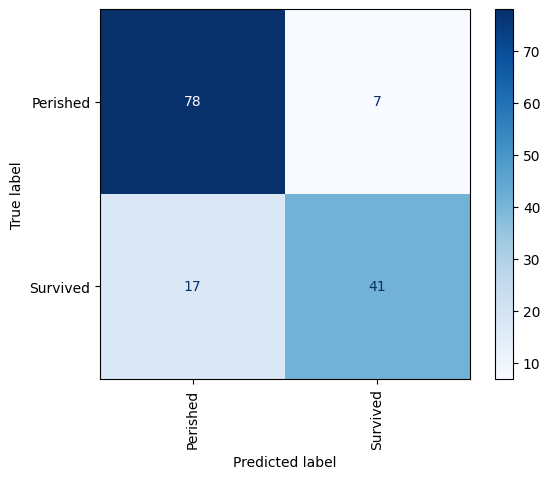

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=["Perished", "Survived"],
    cmap="Blues",
    xticks_rotation="vertical",
);

In [11]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

print("Precision:", precision)
print("Recall:", recall)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Precision: 0.8541666666666666
Recall: 0.7068965517241379
Sensitivity: 0.7068965517241379
Specificity: 0.9176470588235294


In [12]:
female = pd.DataFrame(
    {
        "Age": [30],
        "Sex_female": [1],
        "Sex_male": [0],
        "Pclass_1": [1],
        "Pclass_2": [0],
        "Pclass_3": [0],
    }
)
model.predict(female)[0]

np.int64(1)

In [13]:
probability = model.predict_proba(female)[0][1]
print(f"Probability of survival: {probability:.1%}")

Probability of survival: 91.6%


In [14]:
male = pd.DataFrame(
    {
        "Age": [60],
        "Sex_female": [0],
        "Sex_male": [1],
        "Pclass_1": [0],
        "Pclass_2": [0],
        "Pclass_3": [1],
    }
)
model.predict(male)[0]

np.int64(0)

In [16]:
probability = model.predict_proba(male)[0][1]
print(f"Probability of survival: {probability:.1%}")

Probability of survival: 2.9%
